In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# # 코랩 한글
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv("SCALE_preprossed.csv")
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,양품,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,양품,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,양품,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,양품,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,양품,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0


In [ ]:

df_raw['scale'] = df_raw['scale'].map({'양품': 0, '불량': 1})


In [ ]:
df_raw

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
df_x = df_raw.drop("scale" , axis = 1)
df_y = df_raw["scale"]


In [ ]:
df_x

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_x)
df_raw_dummy.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,32,3700,15100,1144,116,1133,59,259,934.0,8,...,0,0,1,0,0,1,1,0,0,0
1,32,3700,15100,1144,122,1135,53,238,937.0,8,...,0,0,0,1,0,1,1,0,0,0
2,33,3600,19200,1129,116,1121,55,258,889.0,8,...,1,0,1,0,0,1,1,0,0,0
3,33,3600,19200,1152,125,1127,68,266,885.0,8,...,1,0,0,1,0,1,1,0,0,0
4,38,3100,13300,1140,134,1128,48,246,873.0,8,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
df_raw_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pt_thick                   1000 non-null   int64  
 1   pt_width                   1000 non-null   int64  
 2   pt_length                  1000 non-null   int64  
 3   fur_heat_temp              1000 non-null   int64  
 4   fur_heat_time              1000 non-null   int64  
 5   fur_soak_temp              1000 non-null   int64  
 6   fur_soak_time              1000 non-null   int64  
 7   fur_total_time             1000 non-null   int64  
 8   rolling_temp               1000 non-null   float64
 9   descaling_count            1000 non-null   int64  
 10  bf_temp                    1000 non-null   float64
 11  spec_country_공통            1000 non-null   uint8  
 12  spec_country_독일            1000 non-null   uint8  
 13  spec_country_미국            1000 non-null   uint8 

In [ ]:
import pandas as pd
df_final = pd.concat([df_raw_dummy, df_y], axis=1)
df_final

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조,scale
0,32,3700,15100,1144,116,1133,59,259,934.0,8,...,0,1,0,0,1,1,0,0,0,0
1,32,3700,15100,1144,122,1135,53,238,937.0,8,...,0,0,1,0,1,1,0,0,0,0
2,33,3600,19200,1129,116,1121,55,258,889.0,8,...,0,1,0,0,1,1,0,0,0,0
3,33,3600,19200,1152,125,1127,68,266,885.0,8,...,0,0,1,0,1,1,0,0,0,0
4,38,3100,13300,1140,134,1128,48,246,873.0,8,...,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,3400,41500,1142,55,1151,86,203,948.0,10,...,0,0,1,1,0,0,0,0,1,0
996,19,3400,41500,1142,55,1151,86,209,948.0,10,...,0,0,1,1,0,0,0,0,1,0
997,17,3400,43700,1169,65,1163,77,227,948.0,10,...,0,0,1,1,0,0,0,0,1,0
998,17,3400,43700,1169,65,1163,77,204,948.0,10,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df_raw

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
df_raw_dummy[df_raw_dummy["rolling_temp"] < 800]

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
99,74,2700,9800,1113,96,1122,68,255,773.0,6,...,1,0,0,1,0,1,0,1,0,0
100,74,2700,9800,1113,96,1122,68,258,773.0,6,...,1,0,0,1,1,0,0,1,0,0
101,76,2700,9700,1123,79,1126,61,231,760.0,5,...,0,1,0,1,0,1,0,1,0,0
102,76,2700,9700,1123,79,1126,61,206,760.0,6,...,0,1,0,1,1,0,0,1,0,0
549,40,2500,22700,1178,90,1127,138,301,745.0,6,...,0,0,1,0,0,1,0,1,0,0
631,13,3400,53700,1147,73,1129,57,218,723.0,10,...,1,0,0,1,1,0,0,0,1,0
632,13,3400,53700,1147,73,1129,99,228,723.0,10,...,1,0,0,1,1,0,0,0,1,0
633,13,3400,53700,1147,73,1129,103,278,723.0,10,...,1,0,0,1,1,0,0,0,1,0
634,13,3400,53700,1147,73,1129,107,246,723.0,10,...,1,0,0,1,1,0,0,0,1,0


In [ ]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy
df_raw_y = df_y

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.2, stratify=df_raw_y, random_state = 133)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (1000, 33)
분할 후 설명변수 데이터 :Train (800, 33)   Test (200, 33)


In [ ]:
df_train_y.value_counts()

0    552
1    248
Name: scale, dtype: int64

In [ ]:
df_test_y.value_counts()

0    138
1     62
Name: scale, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성 (scoring을 'f1'로 설정)
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=133),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)

# 훈련 데이터에 그리드 서치 적용
grid_search.fit(df_train_x, df_train_y)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델 저장
best_tree_model = grid_search.best_estimator_

# train 데이터 F1 점수
train_f1 = f1_score(df_train_y, best_tree_model.predict(df_train_x))
# test 데이터 F1 점수
test_f1 = f1_score(df_test_y, best_tree_model.predict(df_test_x))

print("F1 Score on training set: {:.3f}".format(train_f1))
print("F1 Score on test set: {:.3f}".format(test_f1))


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
F1 Score on training set: 0.996
F1 Score on test set: 0.975


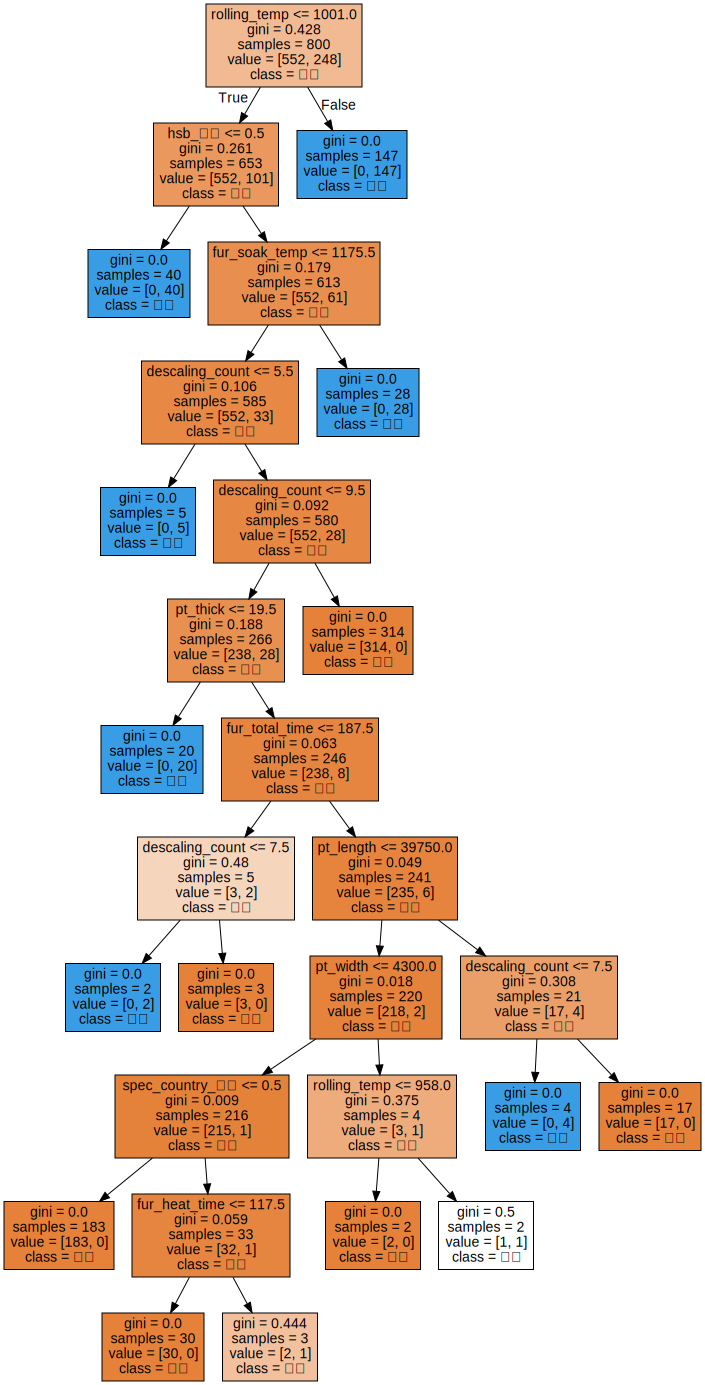

In [ ]:
# tree_final.dot으로 결과 저장
v_feature_name = df_train_x.columns
export_graphviz(best_tree_model, out_file="best_tree_model.dot", class_names = ["양품", "불량"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("best_tree_model.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = best_tree_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,rolling_temp,0.506
21,hsb_적용,0.179
5,fur_soak_temp,0.140
0,pt_thick,0.102
9,descaling_count,0.062
7,fur_total_time,0.004
2,pt_length,0.004
4,fur_heat_time,0.002
1,pt_width,0.001
13,spec_country_미국,0.000


Text(0, 0.5, '설명변수')

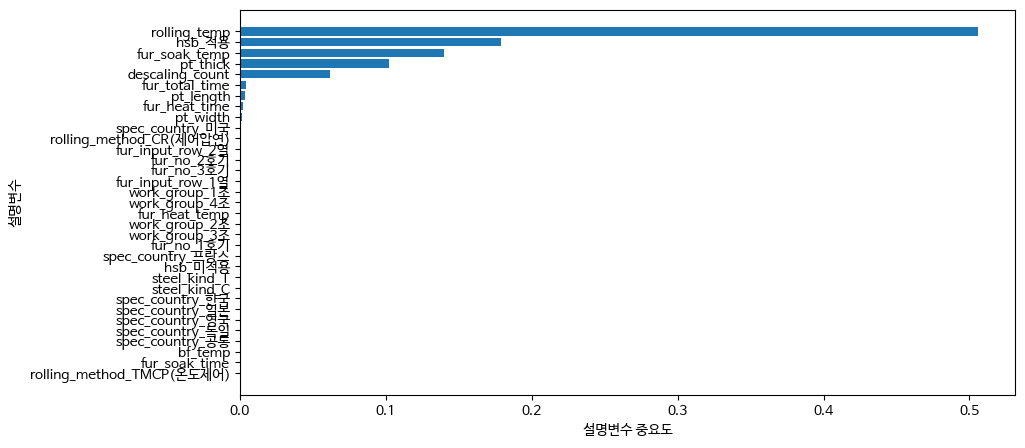

In [ ]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [ ]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = best_tree_model.predict(df_test_x)


# 정확도 계산
accuracy = accuracy_score(df_test_y, y_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(df_test_y, y_pred)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(df_test_y, y_pred)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(df_test_y, y_pred)
print("F1 Score:", f1)

# 혼동 행렬 출력
conf_matrix = confusion_matrix(df_test_y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 클래스별 정밀도와 재현율 출력
class_report = classification_report(df_test_y, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.985
Precision: 1.0
Recall: 0.9516129032258065
F1 Score: 0.9752066115702479
Confusion Matrix:
[[138   0]
 [  3  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       138
           1       1.00      0.95      0.98        62

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [ ]:
# 랜덤 서치

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 의사결정나무 분류기 생성
dt_classifier = DecisionTreeClassifier()

# 탐색할 하이퍼파라미터 분포 지정
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# 랜덤 서치 수행
random_search = RandomizedSearchCV(dt_classifier, param_dist, cv=5, n_iter=20, random_state=42)
random_search.fit(df_train_x, df_train_y)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 의사결정나무 모델 생성
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2, min_samples_split=10 , random_state = 133)

# 모델 학습
dt_classifier.fit(df_train_x, df_train_y)

# 테스트 데이터에 대한 예측
y_pred = dt_classifier.predict(df_test_x)




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# 정확도 계산
accuracy = accuracy_score(df_test_y, y_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(df_test_y, y_pred)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(df_test_y, y_pred)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(df_test_y, y_pred)
print("F1 Score:", f1)

# 혼동 행렬 출력
conf_matrix = confusion_matrix(df_test_y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 클래스별 정밀도와 재현율 출력
class_report = classification_report(df_test_y, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.99
Precision: 1.0
Recall: 0.967741935483871
F1 Score: 0.9836065573770492
Confusion Matrix:
[[138   0]
 [  2  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.97      0.98        62

    accuracy                           0.99       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.99      0.99       200



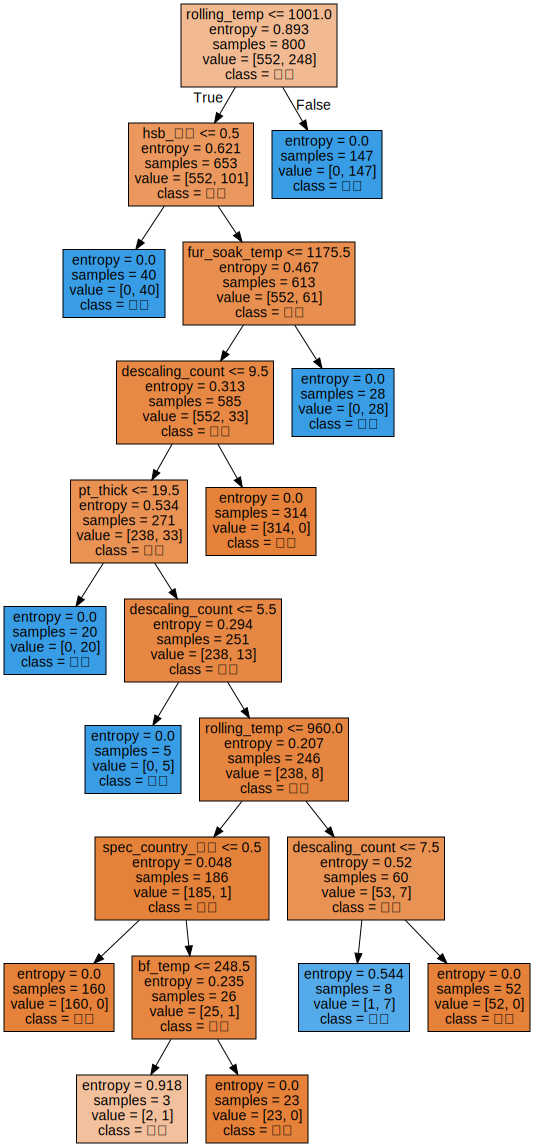

In [ ]:
# tree_final.dot으로 결과 저장
v_feature_name = df_train_x.columns
export_graphviz(dt_classifier, out_file="dt_classifier.dot", class_names = ["양품", "불량"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("dt_classifier.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = dt_classifier.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,rolling_temp,0.452
21,hsb_적용,0.169
5,fur_soak_temp,0.146
9,descaling_count,0.124
0,pt_thick,0.100
10,bf_temp,0.005
13,spec_country_미국,0.004
29,work_group_1조,0.000
28,rolling_method_TMCP(온도제어),0.000
27,rolling_method_CR(제어압연),0.000


In [ ]:
df_importance.sort_values("Importance", ascending=False, inplace = True)


NoneType

Text(0, 0.5, '설명변수')

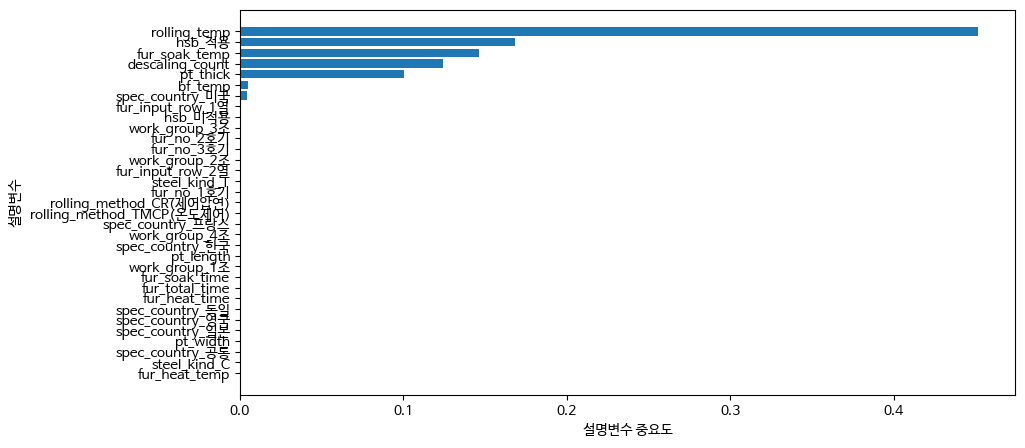

In [ ]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

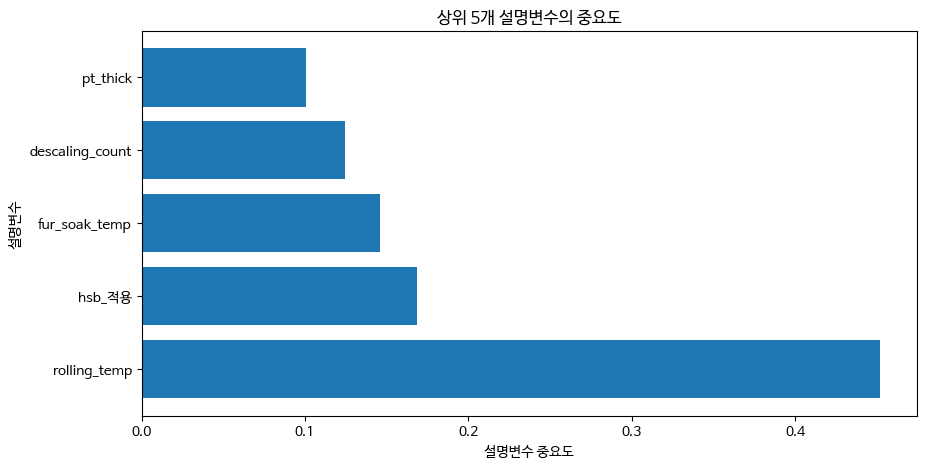

In [ ]:
# 중요도가 높은 상위 5개 변수 추출
top_5_importance = df_importance.nlargest(5, "Importance")

plt.figure(figsize=(10,5))
plt.barh(y=range(len(top_5_importance)), width=top_5_importance["Importance"])
plt.yticks(range(len(top_5_importance)), top_5_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")
plt.title("상위 5개 설명변수의 중요도")
plt.show()


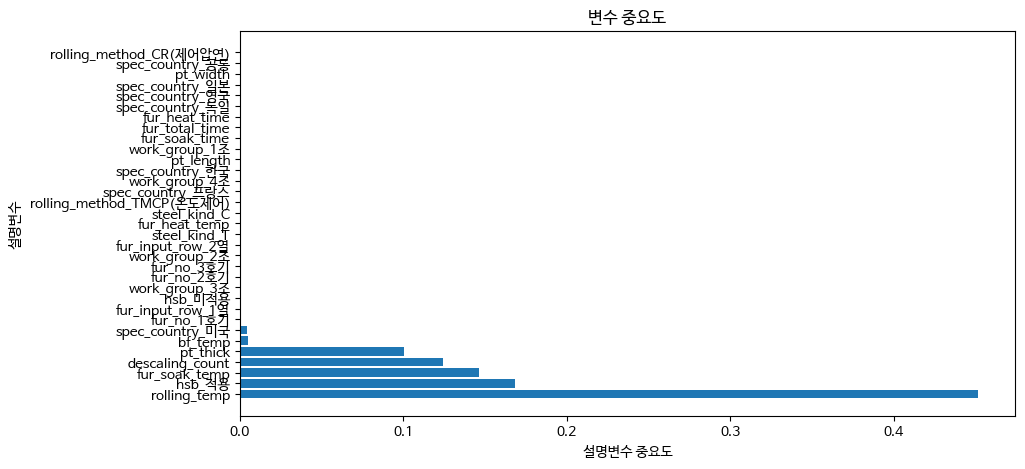

In [ ]:
# 중요도가 높은 변수 순으로 정렬
df_importance_sorted = df_importance.sort_values("Importance", ascending=False)

plt.figure(figsize=(10,5))
plt.barh(y=range(len(df_importance_sorted)), width=df_importance_sorted["Importance"])
plt.yticks(range(len(df_importance_sorted)), df_importance_sorted["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")
plt.title("변수 중요도")
plt.show()


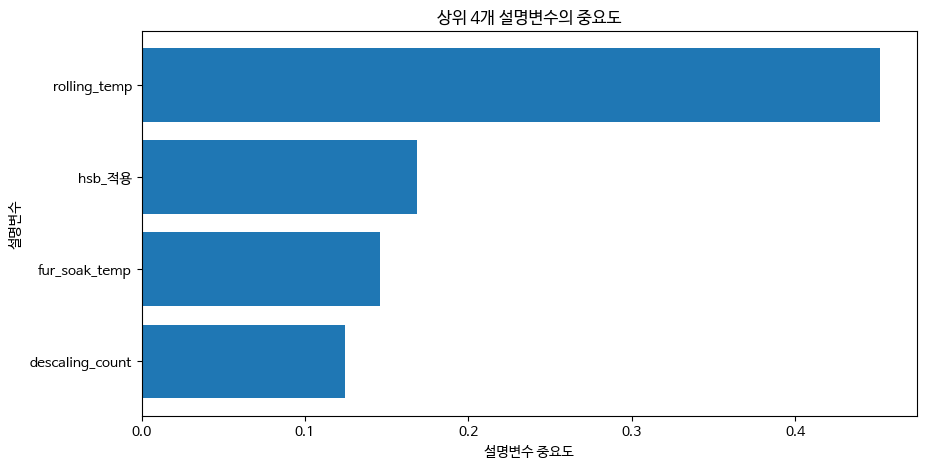

In [ ]:
# 중요도가 높은 상위 5개 변수 추출
top_5_importance = df_importance.nlargest(4, "Importance")

# 중요도가 높은 순으로 정렬
top_5_importance_sorted = top_5_importance.sort_values("Importance", ascending=True)

plt.figure(figsize=(10,5))
plt.barh(y=range(len(top_5_importance_sorted)), width=top_5_importance_sorted["Importance"])
plt.yticks(range(len(top_5_importance_sorted)), top_5_importance_sorted["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")
plt.title("상위 4개 설명변수의 중요도")
plt.show()


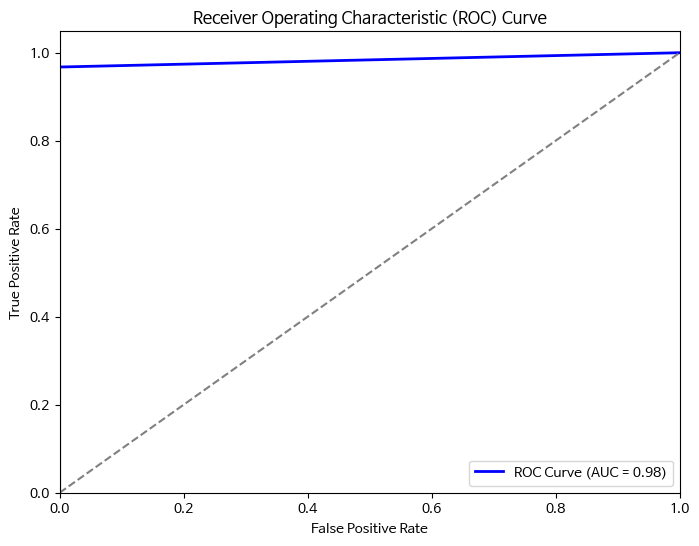

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 계산
y_pred_proba = dt_classifier.predict_proba(df_test_x)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
df_raw

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


## 가설검정



In [ ]:
df_raw

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
# eda 합치기

df_raw



,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
from scipy.stats import shapiro
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
# 교차 테이블 생성
contingency_table = pd.crosstab(df_raw['scale'], df_raw['steel_kind'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# P-value를 기준으로 유의수준을 설정하여 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("검정 결과: 귀무가설을 기각합니다. 양품불량과 강종 간에는 유의한 관계가 있을 가능성이 있습니다.")
else:
    print("검정 결과: 귀무가설을 기각하지 못합니다. 양품불량과 강종 간에는 유의한 관계가 없을 가능성이 있습니다.")


Chi-square value: 77.7104243330205
P-value: 1.1931000837493562e-18
검정 결과: 귀무가설을 기각합니다. 양품불량과 강종 간에는 유의한 관계가 있을 가능성이 있습니다.


In [ ]:
df_raw

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
from scipy import stats

# 양품과 불량 그룹의 'fur_soak_time' 데이터 추출
fur_soak_time_good = df_raw['fur_soak_time'][df_raw['scale'] == '양품']
fur_soak_time_defective = df_raw['fur_soak_time'][df_raw['scale'] == '불량']

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(fur_soak_time_good, fur_soak_time_defective)

# 결과 출력
print("독립표본 t-검정 결과:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 있습니다.")
else:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.")


독립표본 t-검정 결과:
t-statistic: nan
p-value: nan
양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.


In [ ]:
# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(fur_soak_time_good, fur_soak_time_defective)

# 결과 출력
print("독립표본 t-검정 결과:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 있습니다.")
else:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.")

독립표본 t-검정 결과:
t-statistic: nan
p-value: nan
양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.


In [ ]:
from scipy import stats

# 양품과 불량 그룹의 'fur_soak_time' 데이터 추출
fur_soak_time_good = df_raw['fur_soak_time'][df_raw['scale'] == '양품']
fur_soak_time_defective = df_raw['fur_soak_time'][df_raw['scale'] == '불량']

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(fur_soak_time_good, fur_soak_time_defective)

# 결과 출력
print("독립표본 t-검정 결과:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 있습니다.")
else:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.")


독립표본 t-검정 결과:
t-statistic: nan
p-value: nan
양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.


In [ ]:

from scipy import stats

# 양품과 불량 그룹의 'fur_soak_time' 데이터 추출
fur_soak_time_good = df_raw['fur_total_time'][df_raw['scale'] == '양품']
fur_soak_time_defective = df_raw['fur_total_time'][df_raw['scale'] == '불량']

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(fur_soak_time_good, fur_soak_time_defective)

# 결과 출력
print("독립표본 t-검정 결과:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print("양품과 불량 그룹 간의 'fur_total_time'에 유의한 차이가 있습니다.")
else:
    print("양품과 불량 그룹 간의 'fur_total_time'에 유의한 차이가 없습니다.")


독립표본 t-검정 결과:
t-statistic: nan
p-value: nan
양품과 불량 그룹 간의 'fur_total_time'에 유의한 차이가 없습니다.


In [ ]:

from scipy.stats import shapiro
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
# 교차 테이블 생성
contingency_table = pd.crosstab(df_raw['scale'], df_raw['rolling_method'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# P-value를 기준으로 유의수준을 설정하여 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("검정 결과: 귀무가설을 기각합니다. 양품불량과 롤링방법 간에는 유의한 관계가 있을 가능성이 있습니다.")
else:
    print("검정 결과: 귀무가설을 기각하지 못합니다. 양품불량과 롤링방법 간에는 유의한 관계가 없을 가능성이 있습니다.")


Chi-square value: 45.33194472272313
P-value: 1.6631417719483243e-11
검정 결과: 귀무가설을 기각합니다. 양품불량과 롤링방법 간에는 유의한 관계가 있을 가능성이 있습니다.


In [ ]:

from scipy.stats import shapiro
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
# 교차 테이블 생성
contingency_table = pd.crosstab(df_raw['scale'], df_raw['descaling_count'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# P-value를 기준으로 유의수준을 설정하여 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("검정 결과: 귀무가설을 기각합니다. 양품불량과 롤링방법 간에는 유의한 관계가 있을 가능성이 있습니다.")
else:
    print("검정 결과: 귀무가설을 기각하지 못합니다. 양품불량과 롤링방법 간에는 유의한 관계가 없을 가능성이 있습니다.")


Chi-square value: 216.08545929259247
P-value: 1.0242624048898764e-44
검정 결과: 귀무가설을 기각합니다. 양품불량과 롤링방법 간에는 유의한 관계가 있을 가능성이 있습니다.


In [ ]:

# 교차 테이블 생성
contingency_table = pd.crosstab(df_raw['scale'], df_raw['descaling_count'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# P-value를 기준으로 유의수준을 설정하여 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("검정 결과: 귀무가설을 기각합니다. 양품불량과 롤링방법 간에는 유의한 관계가 있을 가능성이 있습니다.")
else:
    print("검정 결과: 귀무가설을 기각하지 못합니다. 양품불량과 롤링방법 간에는 유의한 관계가 없을 가능성이 있습니다.")

Chi-square value: 216.08545929259247
P-value: 1.0242624048898764e-44
검정 결과: 귀무가설을 기각합니다. 양품불량과 롤링방법 간에는 유의한 관계가 있을 가능성이 있습니다.


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            1000 non-null   int64  
 1   spec_country     1000 non-null   object 
 2   steel_kind       1000 non-null   object 
 3   pt_thick         1000 non-null   int64  
 4   pt_width         1000 non-null   int64  
 5   pt_length        1000 non-null   int64  
 6   hsb              1000 non-null   object 
 7   fur_no           1000 non-null   object 
 8   fur_input_row    1000 non-null   object 
 9   fur_heat_temp    1000 non-null   int64  
 10  fur_heat_time    1000 non-null   int64  
 11  fur_soak_temp    1000 non-null   int64  
 12  fur_soak_time    1000 non-null   int64  
 13  fur_total_time   1000 non-null   int64  
 14  rolling_method   1000 non-null   object 
 15  rolling_temp     1000 non-null   float64
 16  descaling_count  1000 non-null   int64  
 17  work_group     

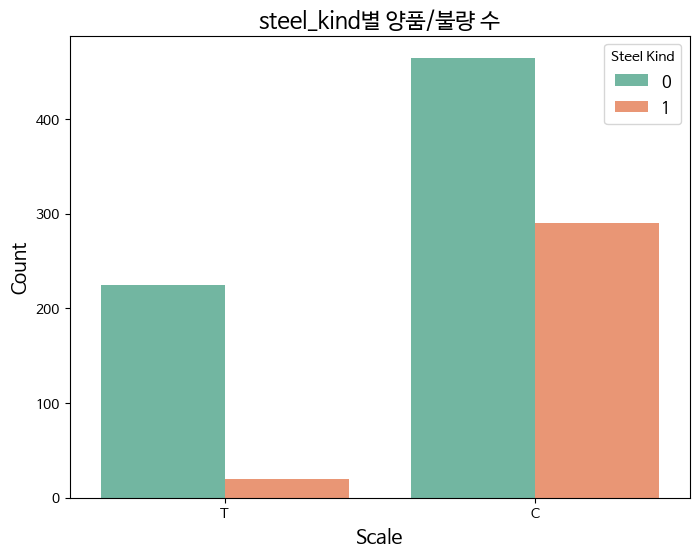

In [ ]:
# seaborn을 사용하여 countplot 그리기
plt.figure(figsize=(8, 6))
sns.countplot(data=df_raw, x='steel_kind', hue='scale' , palette = "Set2")
plt.title('steel_kind별 양품/불량 수', fontsize=16)
plt.xlabel('Scale', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Steel Kind', fontsize=12)
plt.show()

In [ ]:
df_raw["fur_soak_temp"]

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
fur_soak_time_good

Series([], Name: fur_soak_time, dtype: int64)

In [ ]:
fur_soak_time_good = df_raw['fur_soak_time'][df_raw['scale'] == '0']

In [ ]:
fur_soak_time_good

Series([], Name: fur_soak_time, dtype: int64)

In [ ]:
from scipy import stats

# 양품과 불량 그룹의 'fur_soak_time' 데이터 추출
fur_soak_time_good = df_raw['fur_soak_time'][df_raw['scale'] == '0']
fur_soak_time_defective = df_raw['fur_soak_time'][df_raw['scale'] == '1']

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(fur_soak_time_good, fur_soak_time_defective)

# 결과 출력
print("독립표본 t-검정 결과:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 있습니다.")
else:
    print("양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.")


독립표본 t-검정 결과:
t-statistic: nan
p-value: nan
양품과 불량 그룹 간의 'fur_soak_time'에 유의한 차이가 없습니다.


In [ ]:
df_raw

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조,203.0
996,0,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조,203.0
997,0,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조,215.0
998,0,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조,215.0


In [ ]:
# rolling_temp
# 2-Sample t-test
t_result = stats.ttest_ind(df_raw[df_raw["scale"] == 0]["bf_temp"], df_raw[df_raw["scale"] == 1]["bf_temp"], equal_var = True)

# t값,  p값
t, p = t_result.statistic, t_result.pvalue

In [ ]:
# 2-Sample t-test의 t값 p값 출력
print( " 2-Sample t-test ")
print( "  t검정통계량: {} " .format(t)) ; print( " p-value : {} " .format(p))

 2-Sample t-test 
  t검정통계량: 17.959120097727652 
 p-value : 1.0465854688971042e-62 


In [ ]:
# fur_soak_temp
# 2-Sample t-test
t_result = stats.ttest_ind(df_raw[df_raw["scale"] == 0]["fur_soak_temp"], df_raw[df_raw["scale"] == 1]["fur_soak_temp"], equal_var = True)

# t값,  p값
t, p = t_result.statistic, t_result.pvalue